Задача 1: Анализ продаж
Описание: Вам предоставлены данные о продажах компании за последние 2 года в формате CSV. Поля включают: date, product_id, quantity, price.

Требования:

Загрузите данные и очистите их от пропущенных значений.
Рассчитайте общую выручку по каждому продукту за каждый месяц.
Постройте график динамики выручки по месяцам для топ-5 продуктов.
Сделайте выводы о сезонности продаж.
Пример данных:
date,product_id,quantity,price
2022-01-01,1,10,5.0
2022-01-01,2,5,3.0

In [ ]:
import pandas as pd
import numpy as np
import random
import datetime

In [ ]:
#создадим датафрейм

#фиксация_времени
np.random.seed(42)
random.seed(42)


#функция генерации дат
def generate_date():
  year = random.randint(2022, 2023)
  month = random.randint(1, 12)
  day = random.randint(1, 28)
  return datetime.date(year, month, day).strftime('%d.%m.%Y')


n= 10_00
data = {'date':[generate_date()for _ in range(n)],
        'product_id':np.random.randint(1,11,size = n),
        'price':np.random.exponential(10,size = n)+1,
        'quantity':np.round(np.random.normal(10, 1,size = n)),
        'price':np.random.exponential(10,size = n)+1


        }

df = pd.DataFrame(data)
#конвертация даты в дату
df['date'] = pd.to_datetime(df['date']).dt.date
df.head()
df.to_csv("sample_sales.csv",index=False)

<ipython-input-22-212a4e3f27e4>:29: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date']).dt.date


In [ ]:
#download_data
online_reatail_data = pd.read_csv('sample_sales.csv')
online_reatail_data

,date,product_id,price,quantity
0,2022-01-24,7,1.880679,11.0
1,2023-04-08,4,17.460465,11.0
2,2022-12-04,8,20.755835,10.0
3,2022-10-14,5,17.996488,10.0
4,2022-01-03,7,8.189295,10.0
...,...,...,...,...
995,2023-02-01,10,10.748002,9.0
996,2022-06-18,10,17.438097,12.0
997,2022-10-20,8,19.452594,10.0
998,2023-07-01,2,7.591583,11.0


In [ ]:
# data information
online_reatail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1000 non-null   object 
 1   product_id  1000 non-null   int64  
 2   price       1000 non-null   float64
 3   quantity    1000 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 31.4+ KB


In [ ]:
# check missing values
online_reatail_data.isna().sum()

date          0
product_id    0
price         0
quantity      0
revenue       0
month         0
dtype: int64

In [ ]:
#create column revenue as quality*price
online_reatail_data['revenue'] = online_reatail_data['quantity'] * online_reatail_data['price']
#convert date to date_time
online_reatail_data['date'] = pd.to_datetime(online_reatail_data['date'], errors='coerce')
#create column month as month of date
online_reatail_data['month'] = online_reatail_data['date'].dt.month
#create result as group by month and product_id on revenue
result = online_reatail_data.groupby(['month', 'product_id'])['revenue'].sum().reset_index()
#recive top largest it's product_id 10,1,5,3,8
top_5_products = result.groupby('product_id')['revenue'].sum().nlargest(5).index
top_5_data = result[result['product_id'].isin(top_5_products)]



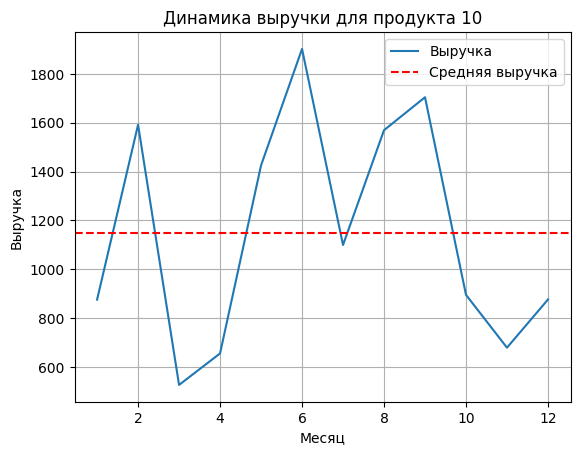

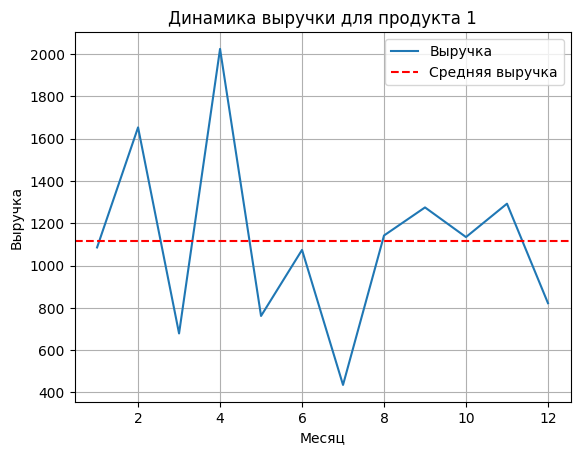

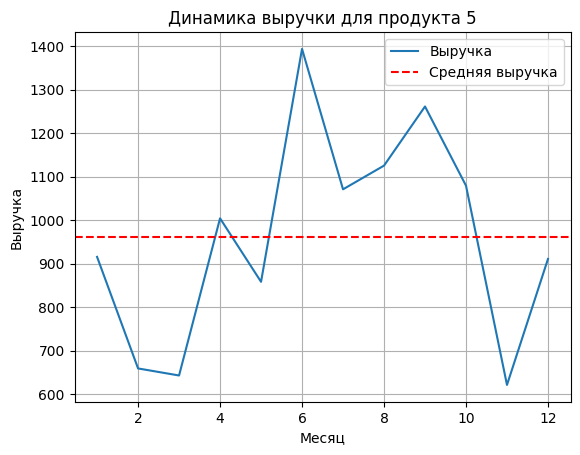

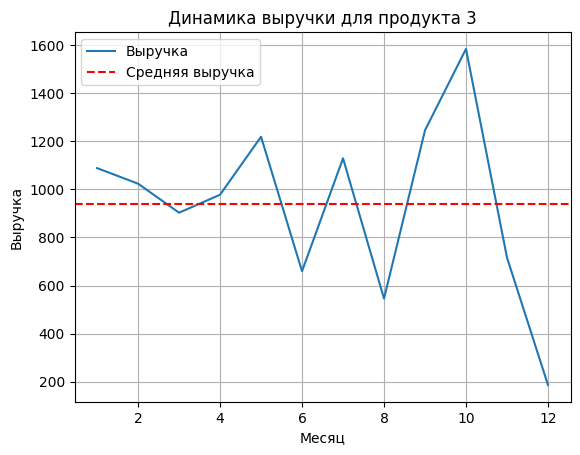

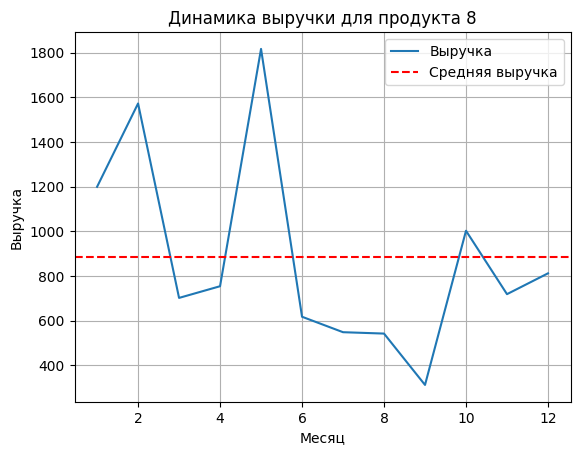

In [ ]:
# create charts

for product_id in top_5_products:
    product_data = top_5_data[top_5_data['product_id'] == product_id]
    plt.figure()

    # avg
    avg_revenue_by_product = product_data['revenue'].mean()

    plt.plot(product_data['month'], product_data['revenue'], label='Выручка')
    plt.axhline(y=avg_revenue_by_product, color='r', linestyle='--', label='Средняя выручка')  # Добавляем линию средней выручки
    plt.xlabel('Месяц')
    plt.ylabel('Выручка')
    plt.title(f'Динамика выручки для продукта {product_id}')
    plt.grid(True)
    plt.legend()
    plt.show()

**Выводы о сезонности продаж**

*Продукт 10*

Максимум выручки в 6 месяце минимум в 3 мес.
Товар продается выше среднего в периоде с 5 по 9 мес

*Продукт 1*

Максимум выручки в 4 месяце минимум в 7 мес.
Товар хорошо продается выше среднего в периоде с 8 по 11 мес.

*Продукт 5*

максимум выручки в 6 мес минимум в 3 и 11 мес.
Товар хорошо продается выше среднего в периоде с 6 по 10 мес.

*Продукт 3*

Максимум в 10 мес минимум в 12 мес.
Товар хорошо продается в периоде с 9 по 10 мес.и 1 по 5(можно доп исследовать)

*Продукт 8*

Максимум в 5 месяце минимум в 9 мес.
Товар хорошо продается в периоде с 1 по 2 мес


Исходя из этого можно предложить:


-динамическое управление запасами,к периоду спроса увеличивать запасы товара в периоды спада снижать.

-управление маркетинговыми компаниями в периоды высокого спроса проводить агрессивные компании с целью продать максимально дорого и много в периоды низкого спроса также проводить компании с целью снижения запасов.

-динамическое ценообразование например в периоды выского спроса повышать цены в периоды низкого снижать.

Задача 2: Сегментация клиентов
Описание: У вас есть данные о покупках клиентов за последний год. Поля включают: customer_id, purchase_date, amount.

Требования:

Загрузите и очистите данные.
Проведите RFM-анализ клиентов.
Разделите клиентов на 4 сегмента на основе RFM-анализа.
Опишите каждый сегмент и предложите маркетинговые стратегии для каждого сегмента.
Пример данных:
customer_id,purchase_date,amount
1,2023-01-15,50.0
2,2023-01-20,30.0

In [ ]:
#создадим датафрейм

#фиксация_времени
np.random.seed(42)
random.seed(42)


#функция генерации дат
def generate_date():
  year = random.randint(2023, 2023)
  month = random.randint(1, 12)
  day = random.randint(1, 28)
  return datetime.date(year, month, day).strftime('%d.%m.%Y')


n= 10_00
data = {'date':[generate_date()for _ in range(n)],
        'customer_id':np.random.randint(1,11,size = n),
        'amount':np.random.exponential(10,size = n)+1,



        }

df = pd.DataFrame(data)
#конвертация даты в дату
df['date'] = pd.to_datetime(df['date']).dt.date
df.head()
df.to_csv("sample_rfm.csv",index=False)

<ipython-input-69-321ffa770c66>:27: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date']).dt.date


In [ ]:
#download_data
reatail_data = pd.read_csv('sample_rfm.csv')
reatail_data

,date,customer_id,amount
0,2023-01-24,7,3.957351
1,2023-04-08,4,13.949761
2,2023-12-04,8,9.988510
3,2023-10-14,5,2.078221
4,2023-01-03,7,26.102309
...,...,...,...
995,2023-02-01,10,6.989643
996,2023-06-18,10,22.409718
997,2023-10-20,8,2.117067
998,2023-07-01,2,45.460551


In [ ]:
# data information
reatail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1000 non-null   object 
 1   customer_id  1000 non-null   int64  
 2   amount       1000 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 23.6+ KB


In [ ]:
# check missing values
reatail_data.isna().sum()

date           0
customer_id    0
amount         0
dtype: int64

In [ ]:
#Calculating
df['date'] = pd.to_datetime(df['date'], errors='coerce')
today = df['date'].max()

rfm = df.groupby('customer_id').agg(
    Recency=('date', lambda x: (today - x.max()).days),
    Frequency=('customer_id', 'count'),
    MonetaryValue=('amount', 'sum')
)

In [ ]:
# segmenting on 4 groups
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2], duplicates='drop')
rfm['F_Score'] = pd.qcut(rfm['Frequency'], 4, labels=[1, 2, 3, 4])
rfm['M_Score'] = pd.qcut(rfm['MonetaryValue'], 4, labels=[1, 2, 3, 4])

In [ ]:
# rfm score
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

#
rfm['Segment'] = 'Newbie'
rfm.loc[rfm['RFM_Score'].isin(['444', '443', '434', '433', '344', '343', '334', '333']), 'Segment'] = 'Potential Loyalist'
rfm.loc[rfm['RFM_Score'].isin(['442', '432', '424', '423', '342', '332', '324', '323', '244', '243', '234', '233']), 'Segment'] = 'Loyalist'
rfm.loc[rfm['RFM_Score'].isin(['441', '431', '421', '414', '413', '412', '411', '341', '331', '321', '314', '313', '312', '311', '241', '231', '224', '223', '222', '221', '214', '213', '212']), 'Segment'] = 'Champion'
rfm.loc[rfm['RFM_Score'].isin(['144', '143', '134', '133', '124', '123', '114', '113', '112', '111', '211']), 'Segment'] = 'At Risk'  # Добавили 211 в At Risk
rfm.loc[rfm['RFM_Score'].isin(['142', '132', '122', '112', '121', '111']), 'Segment'] = 'Hibernating'

#rfm = rfm.reset_index()
grouped_rfm = rfm.groupby('Segment')['customer_id'].apply(list).reset_index()
grouped_rfm
#у нас 4 сегмента
# Champion -Эти клиенты делали покупки очень недавно частота и сумма покупок может быть разной
# Potential Loyalist-Эти клиенты делали покупки относительно недавно но они как правило покупают достаточно часто и много
# Newbie - эти клиенты новички.Недавно совершили первые покупки
# At Risk - это клиенты которых можно потерять они делали покупки очень давно и частота покупок низкая

,Segment,customer_id
0,At Risk,[7]
1,Champion,"[2, 4, 6, 9]"
2,Newbie,[8]
3,Potential Loyalist,"[1, 3, 5, 10]"



**Маркетинговые стратегии для каждого сегмента**


*Potential Loyalist*

Нужно повысить активность и перевести в Champion,предложить бонусны за покупки которые потом можно потратить также на покупки. Программа “друга приведи друга”.Опросы удовлетворенности,что не хватает что бы перевести их в сегмент выше.

*Newbie*

Об этих клиентах нужно узнать больше,какие товары им интересны. Сделать упор на скидочные и специальные предложения с максимальным охватом ассортимента. Выдать карту с небольшим бонусом на покупку.

*Champion*

Можно подумать над программой лояльности например именные карты обслуживания.Поздравления с днем рождения.Именные скидки и про акции.

*At Risk*

Нужно вернуть данных клиентов. Напомнить о компании и продуктах клиенту,email-sms,возможно сделать индвидуальные предложения.Получить обратную связь почему они редко покупают: цены,доставка,обслуживание что не понравилось. Предложить бесплатную консультацию.